In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


ModuleNotFoundError: No module named 'pandas_datareader'

In [2]:
!pip install pandas_datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [4]:
start='2010-01-01'
end='2019-12-31'
df=data.DataReader('AAPL','yahoo',start,end)

In [5]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415358
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515213
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526476
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422665
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410791


In [6]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.623230
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.004578
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,70.977638
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.398895
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,71.920578


In [7]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415358
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515213
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526476
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422665
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410791


In [8]:
df=df.drop(['Date','Adj Close'],axis=1)

In [9]:
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


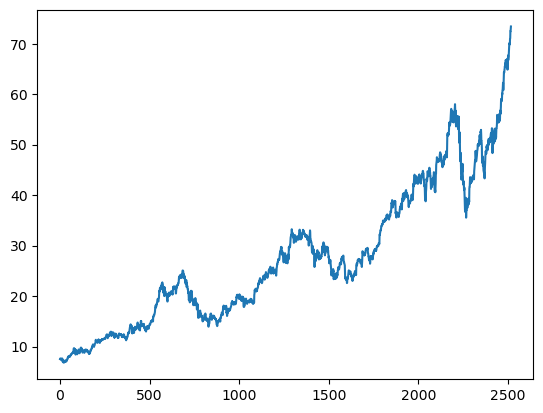

In [10]:
plt.plot(df.Close)

In [11]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2512,71.222504,70.730003,71.172501,71.067497,48478800.0
2513,72.495003,71.175003,71.205002,72.477501,93121200.0
2514,73.492500,72.029999,72.779999,72.449997,146266000.0
2515,73.172501,71.305000,72.364998,72.879997,144114400.0


In [12]:
ma100 = df.Close.rolling(100).mean()

In [13]:
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

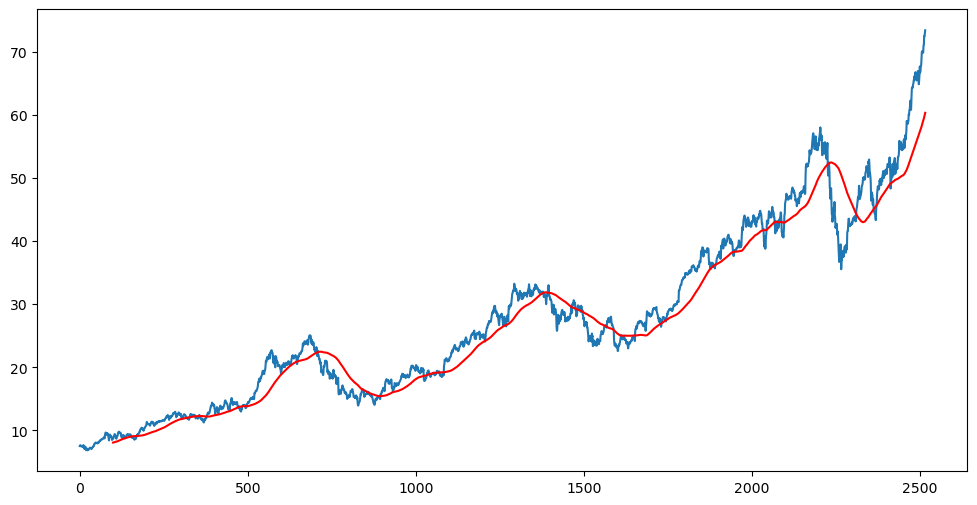

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [16]:
ma200 = df.Close.rolling(200).mean()

In [17]:
ma100


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

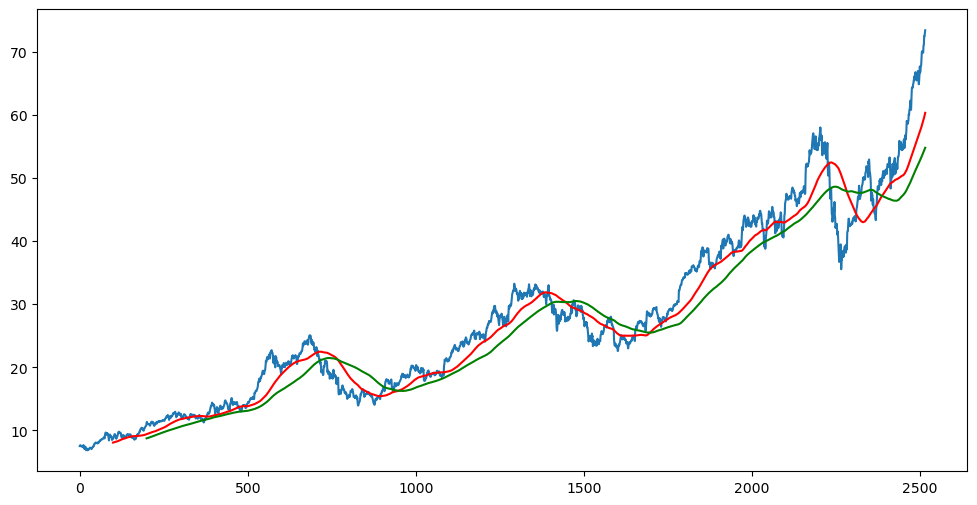

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [19]:
df.shape

(2517, 5)

In [20]:
# splitting data into training and testing

In [25]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [26]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [27]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
#scaled down the training data

In [29]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [33]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train , y_train = np.array(x_train),np.array(y_train)

In [31]:
# the value of the data of predicted on previous 10 days 34 36 33 40 39 38 37 42 44 38 
# first 10 days will become x_train
#11th day will become y_train
#time series analysis

In [34]:
from keras.layers import Dense,Dropout,LSTM

ModuleNotFoundError: No module named 'keras'

In [35]:
!pip install keras

     ---------------------------------------- 1.7/1.7 MB 13.4 MB/s eta 0:00:00


In [36]:
from keras.layers import Dense,Dropout,LSTM

ModuleNotFoundError: No module named 'tensorflow'

In [37]:
!pip install tensorflow

     -------------------------------------- 455.9/455.9 MB 3.1 MB/s eta 0:00:00
     ------------------------------------- 438.7/438.7 kB 13.8 MB/s eta 0:00:00
     --------------------------------------- 14.2/14.2 MB 15.9 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 20.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 23.8 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 23.4 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB ? eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 7.1 MB/s eta 0:00:00
     ------------------------------------- 895.9/895.9 kB 28.6 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     ------------------------------------- 175.4/175.4 kB 11.0 MB/s eta 0:00:00
     ------------------------------------- 781.3/781.3 kB 24.1 M

In [38]:
from keras.layers import Dense,Dropout,LSTM

In [39]:
from keras.models import Sequential

In [42]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [44]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 19s 231ms/step - loss: 0.0488
Epoch 2/50
52/52 [==============================] - 13s 257ms/step - loss: 0.0128
Epoch 3/50
52/52 [==============================] - 13s 244ms/step - loss: 0.0099
Epoch 4/50
52/52 [==============================] - 13s 249ms/step - loss: 0.0078
Epoch 5/50
52/52 [==============================] - 13s 245ms/step - loss: 0.0085
Epoch 6/50
52/52 [==============================] - 11s 211ms/step - loss: 0.0079
Epoch 7/50
52/52 [==============================] - 13s 244ms/step - loss: 0.0082
Epoch 8/50
52/52 [==============================] - 12s 230ms/step - loss: 0.0073
Epoch 9/50
52/52 [==============================] - 10s 200ms/step - loss: 0.0063
Epoch 10/50
52/52 [==============================] - 12s 230ms/step - loss: 0.0063
Epoch 11/50
52/52 [==============================] - 10s 193ms/step - loss: 0.0066
Epoch 12/50
52/52 [==============================] - 11s 219ms/step - loss: 0.0067
Epoch 13/50
5

In [45]:
model.save('keras_model.h5')

In [46]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [47]:
past_100_days = data_training.tail(100)

In [48]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\sanja\AppData\Local\Temp\ipykernel_7964\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [49]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [50]:
input_data = scaler.fit_transform(final_df)
# now the data is scaled down

In [51]:
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [52]:
input_data.shape

(856, 1)

In [55]:
x_test =[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [56]:
x_test , y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [57]:
#making predictions

y_predicted = model.predict(x_test)

In [60]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 3s 76ms/step


In [61]:
y_predicted.shape

(756, 1)

In [62]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [63]:
print(y_predicted)

[[0.15122603]
 [0.15196742]
 [0.1526478 ]
 [0.1532455 ]
 [0.1537446 ]
 [0.15413707]
 [0.15442924]
 [0.15464434]
 [0.15481177]
 [0.15496102]
 [0.15511534]
 [0.15528639]
 [0.15548214]
 [0.15571159]
 [0.15597633]
 [0.1562736 ]
 [0.15659876]
 [0.15694432]
 [0.15731256]
 [0.15771541]
 [0.1581607 ]
 [0.15864912]
 [0.15917175]
 [0.15977083]
 [0.16052336]
 [0.16145703]
 [0.16260335]
 [0.1640147 ]
 [0.1657288 ]
 [0.1677646 ]
 [0.17011616]
 [0.17276438]
 [0.17569217]
 [0.17880157]
 [0.18211478]
 [0.18561275]
 [0.18925622]
 [0.1929887 ]
 [0.19671492]
 [0.20036879]
 [0.2038951 ]
 [0.20724796]
 [0.21041293]
 [0.21338399]
 [0.21616434]
 [0.21875575]
 [0.22116078]
 [0.2233768 ]
 [0.225398  ]
 [0.22722343]
 [0.2288569 ]
 [0.23030408]
 [0.23158568]
 [0.23272929]
 [0.23375438]
 [0.23468822]
 [0.23554131]
 [0.23633012]
 [0.23706622]
 [0.23775372]
 [0.23839492]
 [0.23901749]
 [0.23965505]
 [0.24033202]
 [0.24105814]
 [0.24183148]
 [0.24265286]
 [0.24351184]
 [0.24438807]
 [0.24525619]
 [0.24609014]
 [0.24

In [64]:
#it's very hard to match the values
# so we need to scale it

In [66]:
scaler.scale_

array([0.02099517])

In [67]:
scale_factor = 1/0.02099517
y_predicted = y_predicted *scale_factor
y_test = y_test * scale_factor

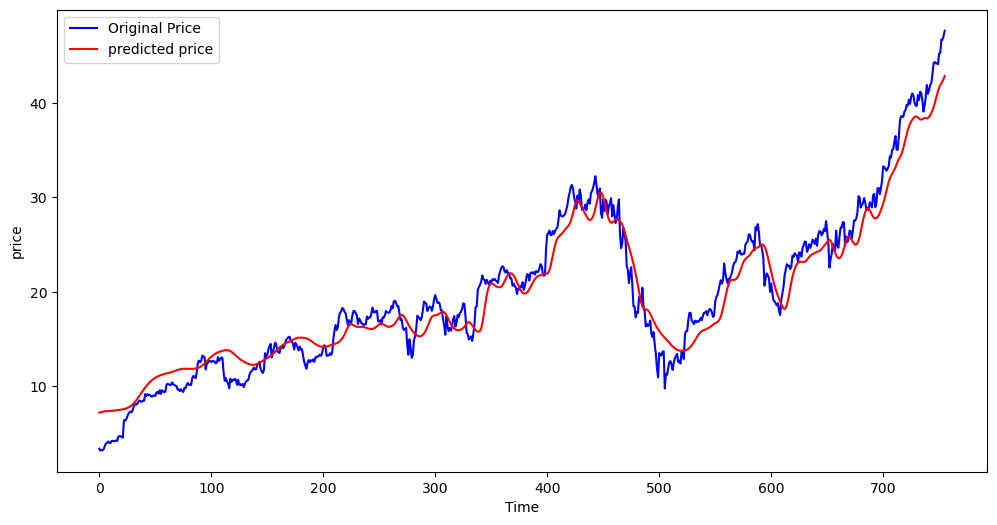

In [69]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label="predicted price")
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
# giving the perfect trent for appl stock